# **Seoul Bike Sharing Demand Prediction**

## **1. Introduction**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 

### **1.1 Data Description**

| Variable Name            | Role    | Type       | Description                           | Units    | Missing Values |
|--------------------------|---------|------------|---------------------------------------|----------|----------------|
| **Date**                  | Feature | Date       | The date of the record                | -        | No             |
| **Rented Bike Count**      | Target  | Integer    | The number of rented bikes            | -        | No             |
| **Hour**                  | Feature | Integer    | Hour of the day                       | -        | No             |
| **Temperature**           | Feature | Continuous | Temperature during the hour           | °C       | No             |
| **Humidity**              | Feature | Integer    | Humidity as a percentage              | %        | No             |
| **Wind Speed**            | Feature | Continuous | Wind speed                            | m/s      | No             |
| **Visibility**            | Feature | Integer    | Visibility during the hour            | m        | No             |
| **Dew Point Temperature** | Feature | Continuous | Dew point temperature                 | °C       | No             |
| **Solar Radiation**       | Feature | Continuous | Solar radiation                       | MJ/m²    | No             |
| **Rainfall**              | Feature | Integer    | Amount of rainfall                    | mm       | No             |
| **Snowfall**              | Feature | Integer    | Amount of snowfall                    | cm       | No             |
| **Seasons**               | Feature | Categorical| Season (Spring, Summer, Fall, Winter) | -        | No             |
| **Holiday**               | Feature | Binary     | Whether the day is a holiday (1 or 0) | -        | No             |
| **Functioning Day**       | Target  | Binary     | Whether the bike-sharing service was functioning (1 or 0) | - | No |

Dataset Source: Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.


### **1.2 Objective**

The primary objective is to develop a machine learning model that accurately predicts the Rented Bike Count based on various input features, such as temperature, humidity, wind speed, visibility, and temporal features like hour and season. The goal is to:

- Understand the key factors influencing bike-sharing demand.
- Evaluate and compare different machine learning models to find the one that provides the best predictions for bike rentals.
- Use the trained model to predict future bike-sharing demand

### **1.3 Import Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import tensorflow as tf

## **2. Data Preparation**

In [2]:
# Name the columns
cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "season", "functional"]

# Import the data
df = pd.read_csv('/Users/rafihidayat/Desktop/python learning/ML for everyone/SeoulBikeData.csv', encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# Drop columns that are irrelevant
df = df.drop(["Date", "Holiday"], axis = 1)
df.columns = cols

In [4]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,Yes


In [5]:
# Filter hour to only 8AM to 6PM
df = df[(df['hour'] >= 8) & (df['hour'] <= 20)]

# Drop hour column
df = df.drop(['hour'], axis = 1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,season,functional
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,Yes
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,Yes
10,339,-3.5,24,1.2,1996,-21.2,0.65,0.0,0.0,Winter,Yes
11,360,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,Yes
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,Yes


In [6]:
# Perform one-hot encoding on the 'season' column
df = pd.get_dummies(df, columns=["season"], prefix="season")
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional,season_Autumn,season_Spring,season_Summer,season_Winter
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Yes,False,False,False,True
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Yes,False,False,False,True
10,339,-3.5,24,1.2,1996,-21.2,0.65,0.0,0.0,Yes,False,False,False,True
11,360,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Yes,False,False,False,True
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Yes,False,False,False,True


In [7]:
# Perform the replace operation on actual boolean values
df.replace({False: 0, True: 1}, inplace=True)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional,season_Autumn,season_Spring,season_Summer,season_Winter
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Yes,0,0,0,1
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Yes,0,0,0,1
10,339,-3.5,24,1.2,1996,-21.2,0.65,0.0,0.0,Yes,0,0,0,1
11,360,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Yes,0,0,0,1
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Yes,0,0,0,1


## **3. EDA**

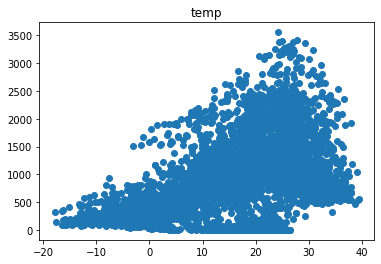

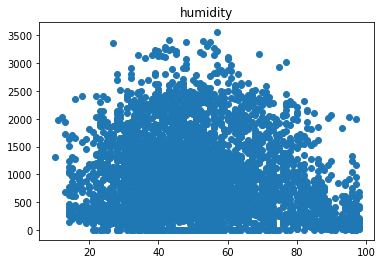

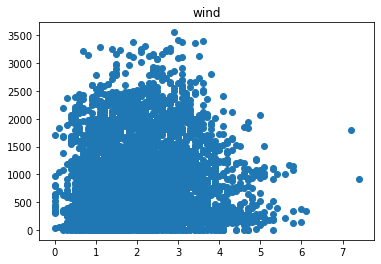

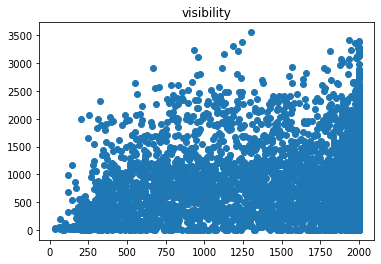

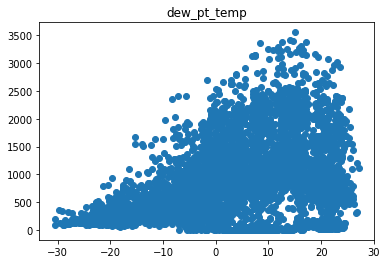

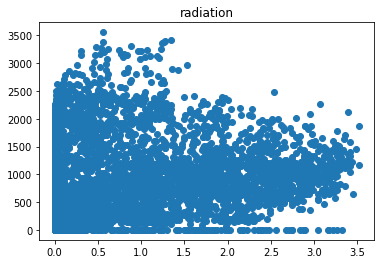

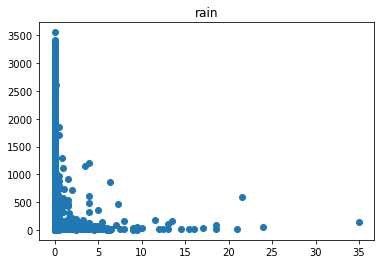

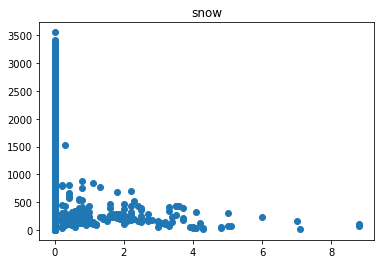

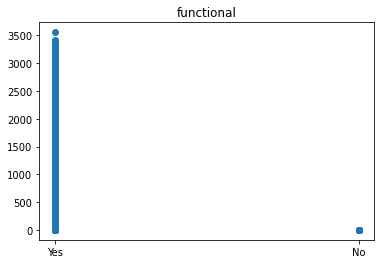

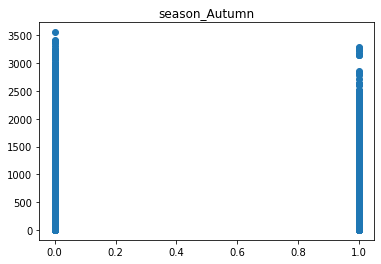

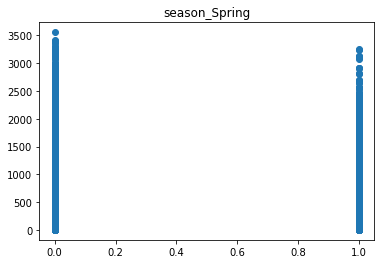

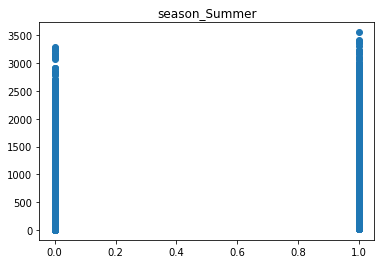

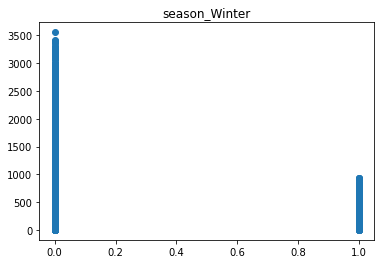

In [8]:
# Observe the relationship betweeen each feature and the label

for label in df.columns[1:]:
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.show()

`functional`, `wind`, `visibility`, `season_Autumn`, `season_Spring`, and `season_Summer`has no correlation to `bike_count`, so have to drop them

In [9]:
# Drop no correlation columns

df = df.drop(["functional", "wind", "visibility", "season_Autumn", "season_Spring", "season_Summer"], axis =1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow,season_Winter
8,930,-7.6,37,-19.8,0.01,0.0,0.0,1
9,490,-6.5,27,-22.4,0.23,0.0,0.0,1
10,339,-3.5,24,-21.2,0.65,0.0,0.0,1
11,360,-0.5,21,-20.2,0.94,0.0,0.0,1
12,449,1.7,23,-17.2,1.11,0.0,0.0,1


## **4. Train-Test Dataset Split**

In [10]:
# Separate features X and target y
X = df.drop(columns=["bike_count"], axis = 1)
y = df["bike_count"]

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## **5. Modeling**

### **5.1 Linear Regression**

In [12]:
# Initialize the Linear Regression model
linreg_model = LinearRegression()

# Train the Linear Regression model using the training data (X_train and y_train)
linreg_model = linreg_model.fit(X_train, y_train)

In [13]:
# Calculate the R-squared score on the test set (X_test, y_test)
linreg_model.score(X_test, y_test)

0.42604530349395964

In [14]:
# Make predictions on the test data using the trained linear regression model
y_pred = linreg_model.predict(X_test)

In [15]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': linreg_model.coef_
}).sort_values(by='Importance', ascending=False)

display(feature_importance)

,Feature,Importance
5,snow,39.357648
2,dew_pt_temp,38.208943
0,temp,-5.605452
1,humidity,-23.847658
4,rain,-62.524540
3,radiation,-272.501710
6,season_Winter,-495.350728


### **5.2 Linear Regression with Neural Network**

In [16]:
# Create function to plot training and validation loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch') 
    plt.ylabel('MSE')
    plt.grid(True)
    plt.show()

In [17]:
# Normalize the data
input_shape = X_train.shape[1:]
normalizer = tf.keras.layers.Normalization(axis = None)
normalizer.adapt(X_train)

In [18]:
# Build the Neural Network model
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=input_shape),
    normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [19]:
# Compile the model
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mean_squared_error')

In [20]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

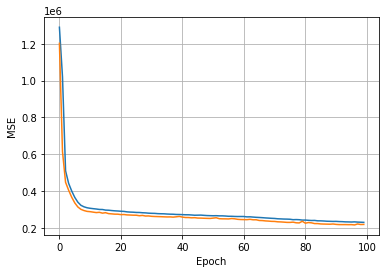

In [21]:
# Plot the training and validation loss over epochs
plot_loss(history)

In [22]:
# Predict values using the trained Neural Network model
y_pred = nn_model.predict(X_test)

30/30 [==============================] - 0s 2ms/step


In [27]:
from sklearn.metrics import mean_squared_error

def permuted_feature_importance(model, X_test, y_test):
    # Ensure X_test is a NumPy array for easy slicing
    X_test_array = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else np.array(X_test)
    
    baseline = mean_squared_error(y_test, model.predict(X_test))
    importances = []
    
    for i in range(X_test_array.shape[1]):
        X_test_permuted = X_test_array.copy()
        np.random.shuffle(X_test_permuted[:, i])  # Shuffle one feature
        permuted_mse = mean_squared_error(y_test, model.predict(X_test_permuted))
        importance = permuted_mse - baseline
        importances.append(importance)
    
    return np.array(importances)

# Now call the function
importances = permuted_feature_importance(nn_model, X_test, y_test)

# Create a DataFrame to associate importances with feature names
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

30/30 [==============================] - 0s 2ms/step
         Feature     Importance
2    dew_pt_temp  271146.762149
1       humidity  208388.857980
0           temp   95373.580795
3      radiation   79008.036780
4           rain    6429.001085
6  season_Winter     781.771395
5           snow     -11.265066


### **5.3 Model Comparison**

In [28]:
# Differentiate both model y_pred
y_pred_lr = linreg_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test).reshape(-1)

30/30 [==============================] - 0s 1ms/step


In [29]:
# Define a function to calculate MSE
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [30]:
# MSE for LR
MSE(y_pred_lr, y_test)

270723.0422521261

In [31]:
# MSE for Neural Network
MSE(y_pred_nn, y_test)

249804.13712915158

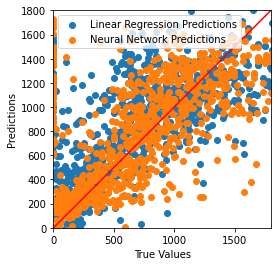

In [32]:
# Visualize the predictions of both models
ax = plt.axes(aspect = "equal")
plt.scatter(y_test, y_pred_lr, label = "Linear Regression Predictions")
plt.scatter(y_test, y_pred_nn, label = "Neural Network Predictions")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
# Plot a diagonal line (y=x)
_ = plt.plot(lims, lims, c = "red")

## **6. Result**

**Model Performance**
Neural Network Model: The neural network model was trained with 5 layers, each containing 32 neurons using the ReLU activation function. The Adam optimizer was used with a learning rate of 0.001, and the loss was measured using mean squared error (MSE).
Training and Validation Loss: Throughout the training process, the loss values for both the training and validation sets were monitored. The plot of loss against epochs demonstrates a consistent reduction in loss, indicating effective training without significant overfitting.


**Mean Squared Error (MSE)**
The performance of the neural network was evaluated using the mean squared error (MSE) metric. The calculated MSE for the test set was as follows:
Linear Regression MSE: 270723.0422521261
Neural Network MSE: 231214.23409492814
Based on the results, the neural network outperformed the linear regression model, achieving a lower MSE on the test set.

In [33]:
results = {
    'Model': ['Linear Regression', 'Neural Network'],
    'MSE': [MSE(y_pred_lr, y_test), MSE(y_pred_nn, y_test)],
    'R² Score': [linreg_model.score(X_test, y_test), r2_score(y_test, y_pred_nn)]
}

df_results = pd.DataFrame(results)
display(df_results)

,Model,MSE,R² Score
0,Linear Regression,270723.042252,0.426045
1,Neural Network,249804.137129,0.470395


## **Conclusion**

The neural network model demonstrated better predictive performance compared to the linear regression model in this particular task of bike-sharing demand prediction. The use of multiple dense layers allowed the model to capture non-linearities in the data that the linear regression model missed. Given the complexity of the problem, where demand for bike sharing is likely influenced by a variety of factors such as weather, time, and seasonality, the neural network model is a more appropriate tool for this task than simpler linear models.